In [1]:
#Problem 2: Route planning in occupancy grid maps using A* - test code with a 5x5 cell

In [2]:
from queue import PriorityQueue
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [3]:
# Read image from disk using PIL
occupancy_map_img = Image.open('../gridmaps/occupancy_map.png')

# Interpret this image as a numpy array, and threshold its values to→ {0,1}
occupancy_grid = (np.asarray(occupancy_map_img) > 0).astype(int)
occupancy_grid

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [4]:
#Test 1 - check if occupancy values are being read properly
print(type(occupancy_grid))
occ = occupancy_grid>0
np.where(occ == True)

<class 'numpy.ndarray'>


(array([ 31,  31,  31, ..., 676, 676, 676]),
 array([515, 517, 518, ...,  99, 100, 101]))

In [5]:
# to test - sample space
# occupancy_grid = ([0,1,0,0,0], [0,1,0,0,0], [0,1,0,0,0], [0,1,0,0,0], [0,0,0,0,0])
occupancy_grid = ([1,1,0,0,1],[1,1,0,1,1],[1,0,0,1,1],[1,1,1,1,1],[1,1,1,1,1], [1,1,1,1,1])
occupancy_grid = np.array(occupancy_grid)
occupancy_grid

array([[1, 1, 0, 0, 1],
       [1, 1, 0, 1, 1],
       [1, 0, 0, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [6]:
def euclidean_h(v1, v2):
    """
    This function is used to calculate the eulcidean distance between 2 points.
    It is used as both the eedge weight and the heuristic h
    """
    euclidean_distance = np.linalg.norm(v1 - v2)
    return euclidean_distance


In [7]:
def RecoverPath(start, goal, pred):
    """
    This function takes as input the start state s, goal state g, and
    populated predecessor map pred, and returns the sequence of vertices on the optimal
    path from s to g.
    
    insert - insert in numpy appends to the top of the list so that we dont have to reverse later. 
    we need a path from start to goal. just append gives from goal to start. 
    so we insert at the beginning of the list using insert. 
    """
    path = []
    current = goal
    while current != start:
        path.insert(0, current)
        current = pred[tuple(current)]
    path.insert(0, start)
    return path
    
    #raise NotImplementedError()


In [8]:
def show_path_occ(grid, plan):
    """
    This function helps display our A* plan on the occupancy grid map
    """
    
    plt.imshow(occupancy_grid, cmap = 'gray')
    plt.plot([p[1] for p in plan], [p[0] for p in plan], 'r')
    plt.show()

In [9]:
def Neighbours(vertex, grid):
    
    """
    This function is used to estimate the neighbours of a vertex and 
    we explore them only if they are not occupied.
    """
    
    x = vertex[0]
    y = vertex[1]
    neighbours = []
    rows, cols = np.shape(grid)
   
    if (x > 0):
        if grid[x - 1][y] != 0:
            neighbours.append((x - 1, y)) #left
    if (x < rows - 1):
        if grid[x + 1][y] != 0:
            neighbours.append((x + 1, y)) #right
    if (y > 0):
        if grid[x][y - 1] != 0:
            neighbours.append((x, y - 1))  #up
    if (y < cols - 1):
        if grid[x][y + 1] != 0:
            neighbours.append((x, y + 1)) #down
    if (x > 0 and y > 0):
        if grid[x - 1][y - 1] != 0:
            neighbours.append((x - 1, y - 1))   #bottom left
    if (x < rows - 1 and y > 0):
        if grid[x + 1][y - 1] != 0:
            neighbours.append((x + 1, y - 1))  #top left
    if (x > 0 and y < cols - 1):
        if grid[x - 1][y + 1] != 0:
            neighbours.append((x - 1, y + 1))   #botton righ
    if x < rows - 1 and y < cols - 1: 
        if grid[x + 1][y + 1] != 0:
            neighbours.append((x + 1, y + 1))  #top right
    
    print("Neighbours to ", x, ",",  y, " are ", neighbours)
    
    return neighbours
    #raise NotImplementedError()



In [10]:
def A_Star_Search(V, s, g, N, w ,h):
    """
    This is the main function that finds a least-cost path from start to goal if one exists
    to remember:
    cost of node = cost from start to node + cost from node to goal
    
    """
    
    #initialization
    
    CostTo = {}
    EstTotalCost = {}
    for v in V:
        CostTo[v] = float("inf")
        EstTotalCost[v] = float("inf")
    
    #cost to reach the starting index is 0
    CostTo[s] = 0
    
    #estimated cost to go from s to g
    EstTotalCost[s] = h(np.array(start), np.array(goal))

    #define the queue and Insert start vertex s with value h(s, g)
    Q = PriorityQueue()
    Q.put((EstTotalCost[s], start))

    pred = {}
    
    while not(Q.empty()):
        
        #Remove least-value element from Q
        vertex = Q.get()

        #We have reached the goal!
        if vertex[1] == goal:
            #Reconstruct and return optimal path
            recovered_path = RecoverPath(start, goal, pred)
            return recovered_path
        
        #else For each of v’s neighbors
        for neighbour in Neighbours(vertex[1], occupancy_grid):
                
                #Cost of path to reach neighbour through v
                pvi = CostTo[vertex[1]] + euclidean_h(np.array(vertex[1]), np.array(neighbour))

                if pvi < CostTo[neighbour]:
                    #The path to neighbour through v is better than the previously-known best path to neighbour
                    #so record it as the new best path to i
                    
                    pred[neighbour] = vertex[1]
                    CostTo[neighbour] = pvi
                    EstTotalCost[neighbour] = pvi + euclidean_h(np.array(neighbour),np.array(goal))
                    
                    if neighbour in Q.queue:
                        #Update the neighbour’s priority
                        Q.queue.remove(neighbour)
                        Q.put((EstTotalCost[neighbour], neighbour))
                    else:
                        Q.put((EstTotalCost[neighbour], neighbour))
                        
                        
    #Return empty set: there is no path to goal                   
    return None


In [11]:
# find shortest path in the occupancy grid from the starting point s = (635, 140) to the goal g = (350, 400)

rows, cols = occupancy_grid.shape
V = set()
for i in range(rows):
    for j in range(cols):
        V.add((i,j))
start = (0, 0)
goal = (4, 4)
plan = A_Star_Search(V, start, goal, Neighbours, euclidean_h, euclidean_h)

Neighbours to  0 , 0  are  [(1, 0), (0, 1), (1, 1)]
Neighbours to  1 , 1  are  [(0, 1), (1, 0), (0, 0), (2, 0)]
Neighbours to  0 , 1  are  [(1, 1), (0, 0), (1, 0)]
Neighbours to  1 , 0  are  [(0, 0), (2, 0), (1, 1), (0, 1)]
Neighbours to  2 , 0  are  [(1, 0), (3, 0), (1, 1), (3, 1)]
Neighbours to  3 , 1  are  [(4, 1), (3, 0), (3, 2), (2, 0), (4, 0), (4, 2)]
Neighbours to  3 , 2  are  [(4, 2), (3, 1), (3, 3), (4, 1), (2, 3), (4, 3)]
Neighbours to  3 , 3  are  [(2, 3), (4, 3), (3, 2), (3, 4), (4, 2), (2, 4), (4, 4)]
Neighbours to  4 , 2  are  [(3, 2), (5, 2), (4, 1), (4, 3), (3, 1), (5, 1), (3, 3), (5, 3)]
Neighbours to  4 , 3  are  [(3, 3), (5, 3), (4, 2), (4, 4), (3, 2), (5, 2), (3, 4), (5, 4)]


In [12]:
#length of the path 
len(plan)

7

In [13]:
distance = np.sum(np.sqrt(np.sum(np.diff(plan, axis=0)**2, axis=1)))
distance

6.82842712474619

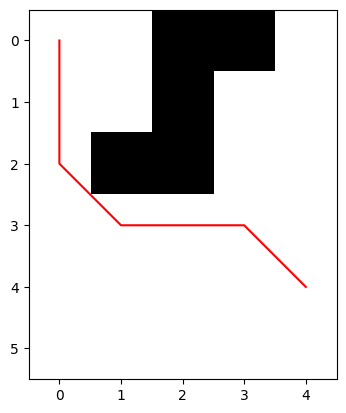

In [14]:
show_path_occ(occupancy_grid, plan)